In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
import random



In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
def random_dates(start_date, end_date, n=200000):
    date_range = (end_date - start_date).days
    random_dates1 = [start_date + timedelta(days=np.random.randint(date_range)) for _ in range(n)]
    return sorted(random_dates1)[:200000]  

In [5]:

def product_data(start_date, end_date, products=['Samsung', 'Oppo', 'Vivo','OnePlus','Realme ','Apple','Nokia ','Redmi','Motorola','ASUS ']):
    dates = random_dates(start_date, end_date, n=20000)
    
    data = []
    for product in products:
        base_sales = np.random.randint(50000, 150000)
        trend = np.linspace(0, 20000, len(dates)) + np.random.normal(0, 50000, len(dates))
        seasonality = 10 * np.sin(np.arange(len(dates)) * (2 * np.pi / 1098))
        random_noise = np.random.normal(0, 4000, len(dates))
        sales = base_sales + trend + seasonality + random_noise 

        product_cost = np.random.randint(15000, 800000)  # Random cost within range 1000 to 20000
        product_data = {'Date': dates, 'ProductName': [product] * len(dates), 'MonthlySales': sales, 'ProductCost': [product_cost] * len(dates)}
        data.append(pd.DataFrame(product_data))

    return pd.concat(data, ignore_index=True)

In [6]:
start_date = datetime(2017, 1, 1)
end_date = datetime(2021, 12, 31)

In [7]:
product_names = ['Samsung', 'Oppo', 'Vivo','OnePlus','Realme ','Apple','Nokia ','Redmi','Motorola','ASUS ']

In [8]:
product_data = product_data(start_date, end_date, products=product_names)

In [9]:
product_data.to_csv('sales_data.csv', index=False)


In [10]:
#Display basic information about the dataset
print(product_data.info())
print(product_data.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          200000 non-null  datetime64[ns]
 1   ProductName   200000 non-null  object        
 2   MonthlySales  200000 non-null  float64       
 3   ProductCost   200000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.1+ MB
None
                                Date   MonthlySales   ProductCost
count                         200000  200000.000000  200000.00000
mean   2019-07-04 08:12:59.040000256  116815.962757  271218.50000
min              2017-01-01 00:00:00 -127113.909620   28800.00000
25%              2018-04-12 00:00:00   79196.344095   71069.00000
50%              2019-07-02 12:00:00  116981.823980  212733.00000
75%              2020-09-28 00:00:00  154520.960827  342073.00000
max              2021-12-30 00:00:00

In [11]:
#first 10 row display
print(product_data.head(10))

        Date ProductName   MonthlySales  ProductCost
0 2017-01-01     Samsung  128957.018411       342073
1 2017-01-01     Samsung   48352.075162       342073
2 2017-01-01     Samsung  187105.637564       342073
3 2017-01-01     Samsung   83042.850125       342073
4 2017-01-01     Samsung  108238.966534       342073
5 2017-01-01     Samsung   43112.494597       342073
6 2017-01-01     Samsung  100114.558386       342073
7 2017-01-01     Samsung  -20661.669948       342073
8 2017-01-01     Samsung  184275.707981       342073
9 2017-01-01     Samsung   54092.255308       342073


In [12]:
# last 5 row display
print(product_data.tail(5))

             Date ProductName   MonthlySales  ProductCost
199995 2021-12-30       ASUS   104185.964691        65052
199996 2021-12-30       ASUS   147017.061826        65052
199997 2021-12-30       ASUS   113997.580337        65052
199998 2021-12-30       ASUS   201960.502028        65052
199999 2021-12-30       ASUS   113312.703931        65052


In [13]:
#missing dataset
print(product_data.dropna())

             Date ProductName   MonthlySales  ProductCost
0      2017-01-01     Samsung  128957.018411       342073
1      2017-01-01     Samsung   48352.075162       342073
2      2017-01-01     Samsung  187105.637564       342073
3      2017-01-01     Samsung   83042.850125       342073
4      2017-01-01     Samsung  108238.966534       342073
...           ...         ...            ...          ...
199995 2021-12-30       ASUS   104185.964691        65052
199996 2021-12-30       ASUS   147017.061826        65052
199997 2021-12-30       ASUS   113997.580337        65052
199998 2021-12-30       ASUS   201960.502028        65052
199999 2021-12-30       ASUS   113312.703931        65052

[200000 rows x 4 columns]


In [14]:

product_data.isna().sum()


Date            0
ProductName     0
MonthlySales    0
ProductCost     0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split



In [16]:
train_data, test_data = train_test_split(product_data, test_size=0.2, random_state=42)


In [17]:
# Display the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (160000, 4)
Testing set shape: (40000, 4)


In [18]:
# Train ARIMA model
def train_arima(train_data):
    model = ARIMA(train_data['MonthlySales'], order=(5,1,0))
    arima_model = model.fit()
    return arima_model

arima_model = train_arima(train_data)


In [21]:
def train_exponential_smoothing(train_data):
    model = ExponentialSmoothing(train_data['MonthlySales'], seasonal_periods=12, trend='add', seasonal='add')
    exp_model = model.fit()
    return exp_model
    exp_model = train_exponential_smoothing(train_data)

In [23]:
from datetime import timedelta
import pandas as pd

start_date_forecast = pd.Timestamp(product_data['Date'].max()) + timedelta(days=1)
end_date_forecast = start_date_forecast + timedelta(days=365)



In [24]:
forecast_results_arima = forecast_demand(arima_model, start_date_forecast, end_date_forecast,train_data)
forecast_results_exp = forecast_demand(exp_model, start_date_forecast, end_date_forecast,train_data)

In [25]:
print("\nForecasted demand for the next year (ARIMA model):")
print(forecast_results_arima)


Forecasted demand for the next year (ARIMA model):
         Date    ProductCost
0  2022-01-01  271399.053156
1  2022-02-01  271399.053156
2  2022-03-01  271399.053156
3  2022-04-01  271399.053156
4  2022-05-01  271399.053156
5  2022-06-01  271399.053156
6  2022-07-01  271399.053156
7  2022-08-01  271399.053156
8  2022-09-01  271399.053156
9  2022-10-01  271399.053156
10 2022-11-01  271399.053156
11 2022-12-01  271399.053156


In [26]:
print("\nForecasted demand for the next year (Exponential Smoothing model):")
print(forecast_results_exp)


Forecasted demand for the next year (Exponential Smoothing model):
         Date    ProductCost
0  2022-01-01  271399.053156
1  2022-02-01  271399.053156
2  2022-03-01  271399.053156
3  2022-04-01  271399.053156
4  2022-05-01  271399.053156
5  2022-06-01  271399.053156
6  2022-07-01  271399.053156
7  2022-08-01  271399.053156
8  2022-09-01  271399.053156
9  2022-10-01  271399.053156
10 2022-11-01  271399.053156
11 2022-12-01  271399.053156


In [40]:

def calculate_rmse(predictions, actual):
    return np.sqrt(mean_squared_error(actual, predictions))

arima_predictions = arima_model.predict(start=0, end=len(test_data)-1)
exp_predictions = exp_model.predict(start=0, end=len(test_data)-1)

arima_rmse = calculate_rmse(arima_predictions, test_data['MonthlySales'])
exp_rmse = calculate_rmse(exp_predictions, test_data['MonthlySales'])

print("\nRMSE for ARIMA model:", arima_rmse)
print("RMSE for Exponential Smoothing model:", exp_rmse)


RMSE for ARIMA model: 62971.56349153855
RMSE for Exponential Smoothing model: 59146.64854863634


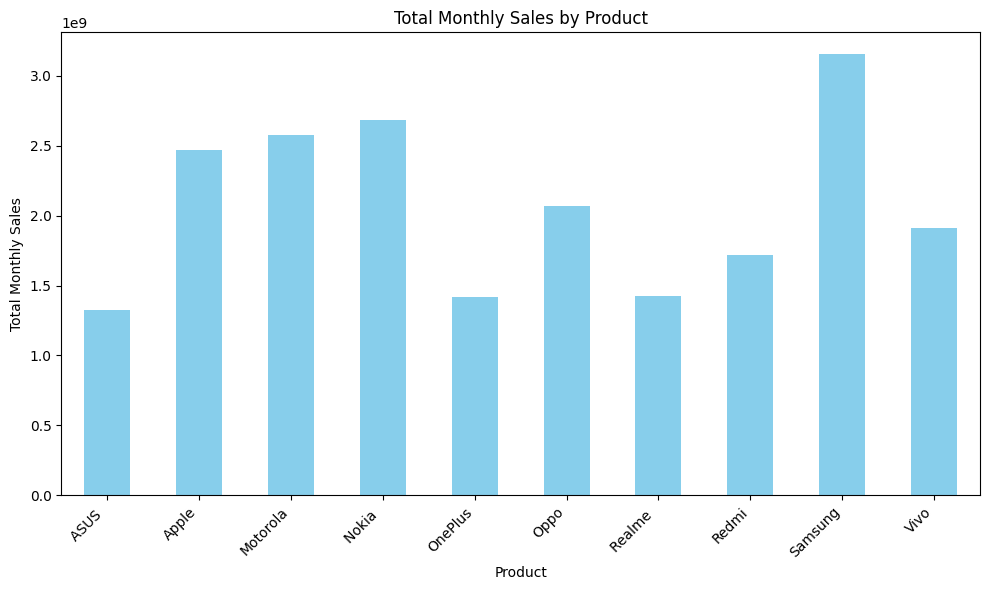

In [43]:
# Bar chart for total monthly sales by product
product_data = product_data.groupby('ProductName')['MonthlySales'].sum()
plt.figure(figsize=(10, 6))
product_data.plot(kind='bar', color='skyblue')
plt.title('Total Monthly Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Monthly Sales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

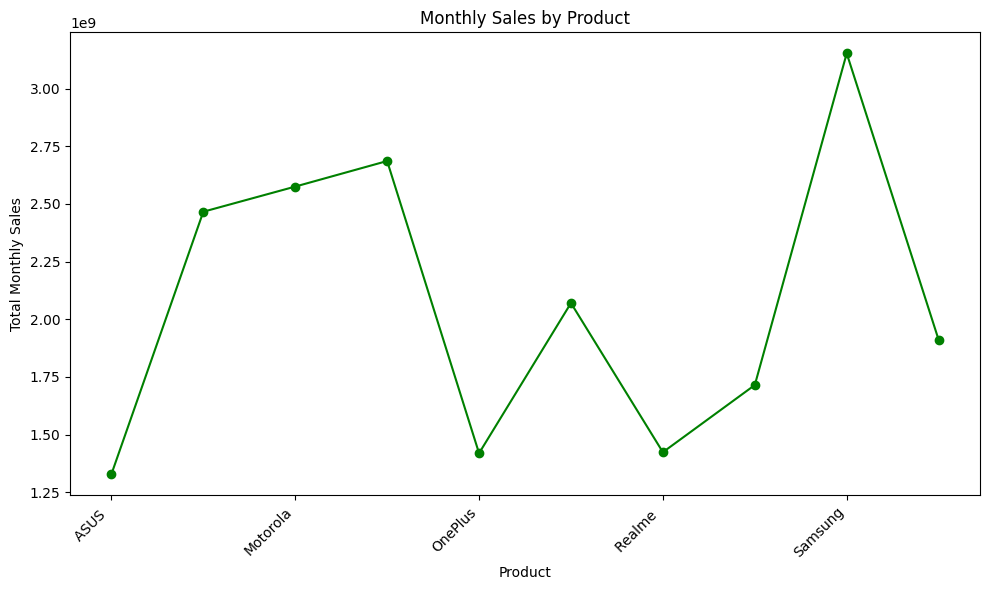

In [46]:

# Line plot for monthly sales
plt.figure(figsize=(10, 6))
product_data.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Monthly Sales')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

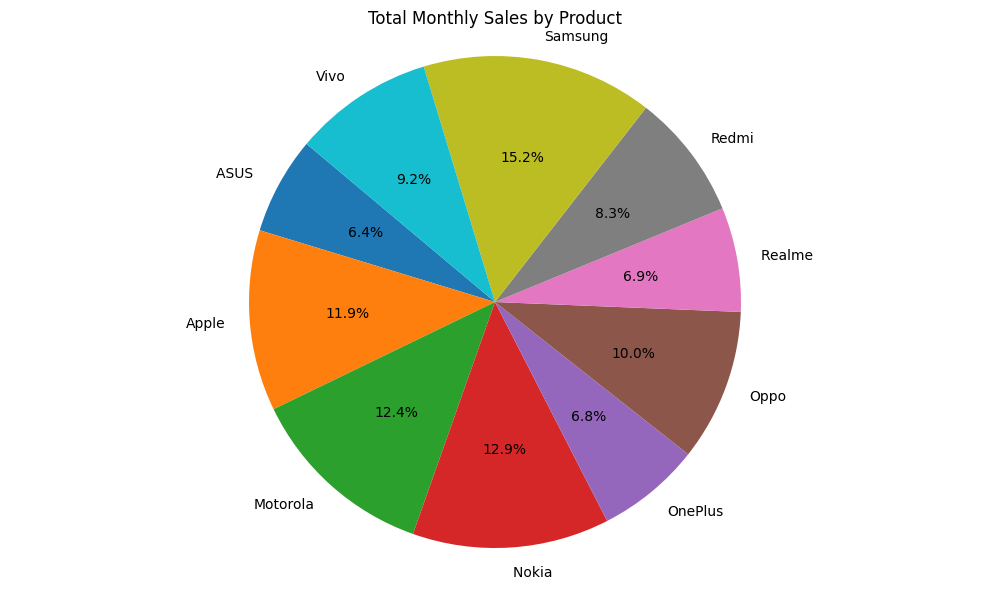

In [45]:
# Pie chart for total monthly sales by product
plt.figure(figsize=(10, 6))
plt.pie(product_data.values, labels=product_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Monthly Sales by Product')
plt.axis('equal')  
plt.tight_layout()
plt.show()